In [1]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
path = 'data/site_20230322.001.h5'

file = h5py.File(path, 'r')
dataset = file['Data'].get('Table Layout') # type: ignore
data_array = np.array(dataset)
print(file['Metadata']['Data Parameters'][()]) # type: ignore

file.close()

[(b'YEAR', b'Year (universal time)', 0, b'y', b'Madrigal Hdf5 Prolog Parameters')
 (b'MONTH', b'Month (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'DAY', b'Day (universal time)', 0, b'd', b'Madrigal Hdf5 Prolog Parameters')
 (b'HOUR', b'Hour (universal time)', 0, b'h', b'Madrigal Hdf5 Prolog Parameters')
 (b'MIN', b'Minute (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'SEC', b'Second (universal time)', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'RECNO', b'Logical Record Number', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINDAT', b'Kind of data', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINST', b'Instrument Code', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT1_UNIX', b'Unix seconds (1/1/1970) at start', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT2_UNIX', b'Unix seconds (1/1/1970) at end', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'GPS_SITE', b'Four letter GPS receiver code', 0, b'N/A', b'Geographic 

C:\Users\virtanem\AppData\Local\Temp\ipykernel_21640\2852329852.py:5: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  data_array = np.array(dataset)


In [3]:
df = pd.DataFrame(data_array)
df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df.drop(['recno','kindat','kinst','ut1_unix','ut2_unix', 'year', 'month', 'day', 'hour', 'minute', 'second', 'min', 'sec', 'gps_site'], axis=1)
df = df.loc[(df['galtr']>-1)&(df['galtr']<0)]
df


,gdlatr,gdlonr,galtr,datetime
434,30.407419,-91.180252,-0.005208,2023-03-22 11:59:59
492,-28.745695,114.625740,-0.003386,2023-03-22 11:59:59
523,16.262304,-61.527538,-0.025554,2023-03-22 11:59:59
581,33.274269,-117.444893,-0.013100,2023-03-22 11:59:59
583,33.274269,-117.444893,-0.013100,2023-03-22 11:59:59
...,...,...,...,...
5156,29.631004,-83.108147,-0.013793,2023-03-22 11:59:59
5184,32.027691,-115.199203,-0.030200,2023-03-22 11:59:59
5209,25.824608,-80.319183,-0.006408,2023-03-22 11:59:59
5213,37.543049,-122.015930,-0.003409,2023-03-22 11:59:59


c:\Users\virtanem\Anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


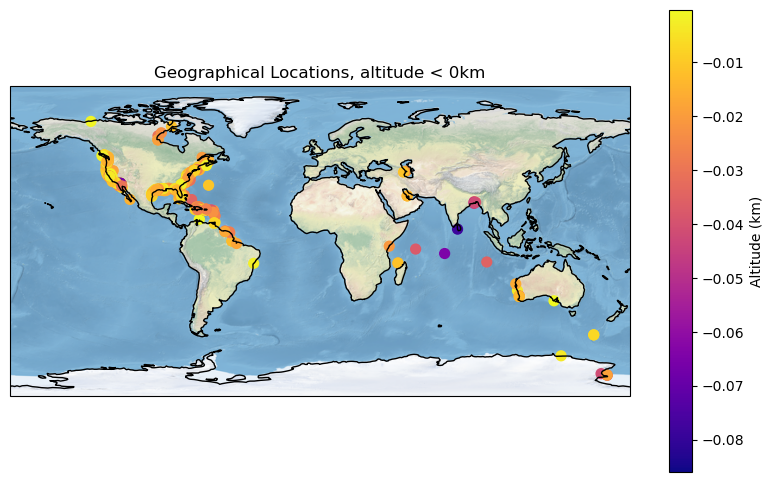

In [4]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

norm = plt.Normalize(np.min(df['galtr']), np.max(df['galtr']))

# Create a colormap
cmap = plt.get_cmap('plasma')

# Plot data with colors based on altitude
sc = ax.scatter(df['gdlonr'], df['gdlatr'], c=df['galtr'], cmap=cmap, s=50, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Altitude (km)')

# Add map features
ax.coastlines()
ax.stock_img()
#ax.set_extent([-10, 40, 45, 72])

# Customize the plot
ax.set_title('Geographical Locations, altitude < 0km')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()